# Term-Project
- 기계학습 02분반 (이형준 교수님)
- 앙상블 러닝(Ensemble Learning) 모델
   - XGBoost, 조주연
- 신경망(Neural Network) 모델
   - ResNet, 박인애
   - GoogLeNet, 박유진
- 데이터 셋
   - cifar10

### 이미지 데이터 확인

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 로드
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 분류 항목(집합)=10개
num_classes=10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Matplotlib config
plt.rc('image', cmap='gray')
plt.rc('grid', linewidth=0)
plt.rc('xtick', top=False, bottom=False, labelsize='large')
plt.rc('ytick', left=False, right=False, labelsize='large')
plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
plt.rc('text', color='a8151a')
plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts
MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")

# utility to display a row of digits with their predictions
def display_images(digits, predictions, labels, title):

    n = num_classes  # 위에서 분류할 항목 개수 지정함

    indexes = np.random.choice(len(predictions), size=n)
    n_digits = digits[indexes]
    n_predictions = predictions[indexes]
    n_predictions = n_predictions.reshape((n,))
    n_labels = labels[indexes]

    fig = plt.figure(figsize=(20, 4))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])

    for i in range(10):
        ax = fig.add_subplot(1, 10, i+1)
        class_index = n_predictions[i]

        plt.xlabel(classes[class_index])
        plt.xticks([])
        plt.yticks([])
        plt.imshow(n_digits[i])

# utility to display training and validation curves
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

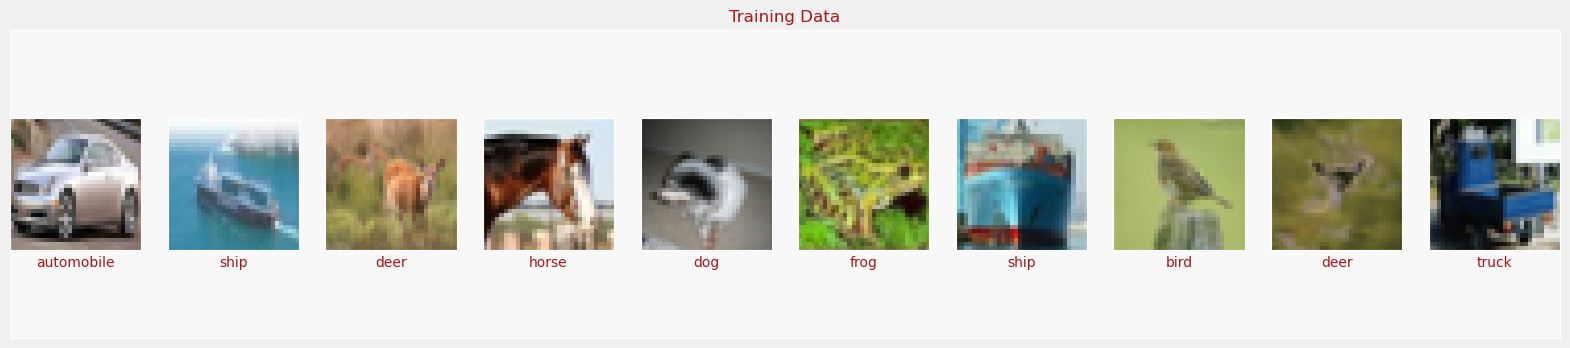

In [14]:
display_images(x_train, y_train, y_train, "Training Data" )

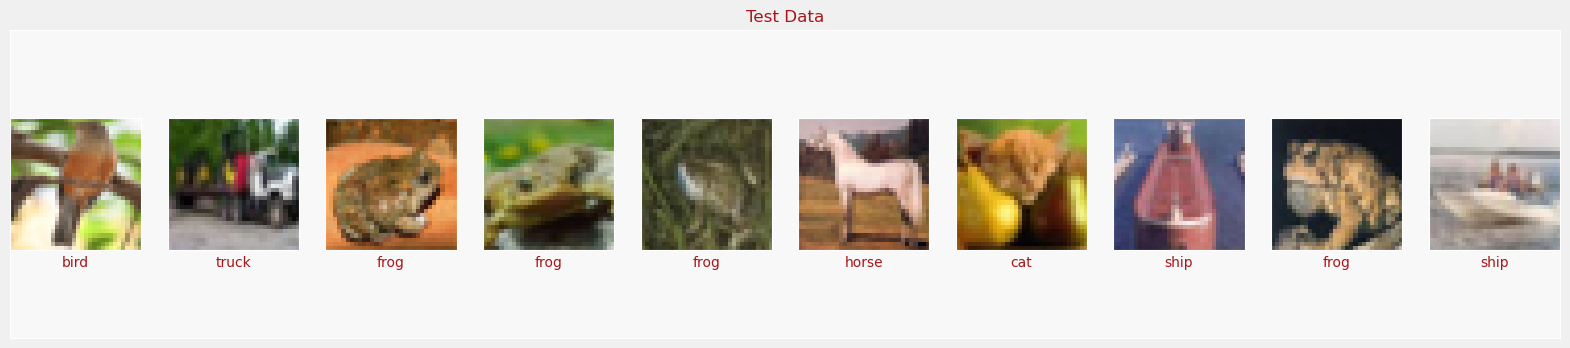

In [4]:
display_images(x_test, y_test, y_test, "Test Data" )

# 1. XGBoost

In [15]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 6.6 MB/s eta 0:00:00


In [16]:
pip install seaborn matplotlib

In [17]:
!pip install -U xgboost

#### (1) 데이터 셋 불러오기

In [4]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
import seaborn as sns   # confusion matrix 시각화에 필요
import matplotlib.pyplot as plt
from xgboost import plot_tree

# CIFAR-10 데이터셋 로드
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 데이터 전처리
x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

# 데이터를 훈련 및 테스트 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42)

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(x_test_flat)

#### (2) XGBoost 모델 학습

In [10]:
# XGBoost 모델 파라미터 설정
param = {
    'max_depth': 6,
    'eta': 0.3,
    'objective': 'multi:softmax',
    'num_class': 10,
    'eval_metric': 'merror'
}

# 모델 훈련
ep = 10    # 10번 학습 돌리기
evals_result = {}
bst = xgb.train(param, dtrain, ep, evals=[(dtrain, 'train'), (dval, 'validation')], early_stopping_rounds=20, evals_result=evals_result)

[0]	train-merror:0.58980	validation-merror:0.67710
[1]	train-merror:0.53563	validation-merror:0.63870
[2]	train-merror:0.49738	validation-merror:0.61940
[3]	train-merror:0.46858	validation-merror:0.60650
[4]	train-merror:0.44360	validation-merror:0.59690
[5]	train-merror:0.42315	validation-merror:0.59260
[6]	train-merror:0.40627	validation-merror:0.58260
[7]	train-merror:0.39022	validation-merror:0.57800
[8]	train-merror:0.37370	validation-merror:0.57170
[9]	train-merror:0.35950	validation-merror:0.56850


#### (3) 예측 데이터 생성 및 모델 평가

In [11]:
# 테스트 데이터에 대한 예측
y_pred = bst.predict(dtest)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# classification report 출력
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Test Accuracy: 0.4353
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51      1000
           1       0.52      0.49      0.51      1000
           2       0.35      0.31      0.33      1000
           3       0.32      0.24      0.27      1000
           4       0.36      0.35      0.36      1000
           5       0.39      0.37      0.38      1000
           6       0.39      0.54      0.45      1000
           7       0.50      0.43      0.46      1000
           8       0.52      0.57      0.55      1000
           9       0.47      0.52      0.49      1000

    accuracy                           0.44     10000
   macro avg       0.43      0.44      0.43     10000
weighted avg       0.43      0.44      0.43     10000



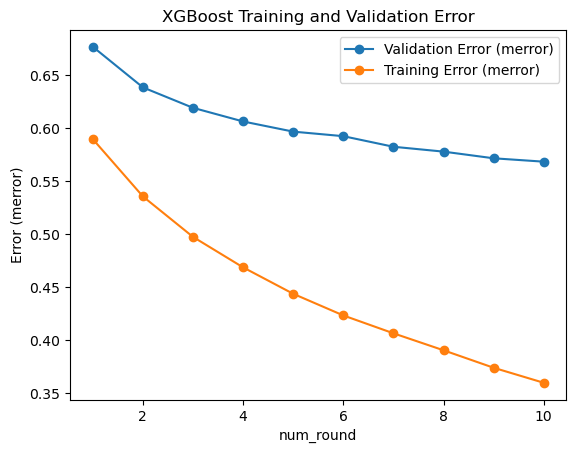

In [12]:
# validation-merror 추적
validation_errors = evals_result['validation']['merror']
training_errors = evals_result['train']['merror']


# 그래프 시각화
plt.plot(range(1, len(validation_errors) + 1), validation_errors, marker='o', label='Validation Error (merror)')
plt.plot(range(1, len(training_errors) + 1), training_errors, marker='o', label='Training Error (merror)')
plt.xlabel('num_round')
plt.ylabel('Error (merror)')
plt.title('XGBoost Training and Validation Error')
plt.legend()
plt.show()

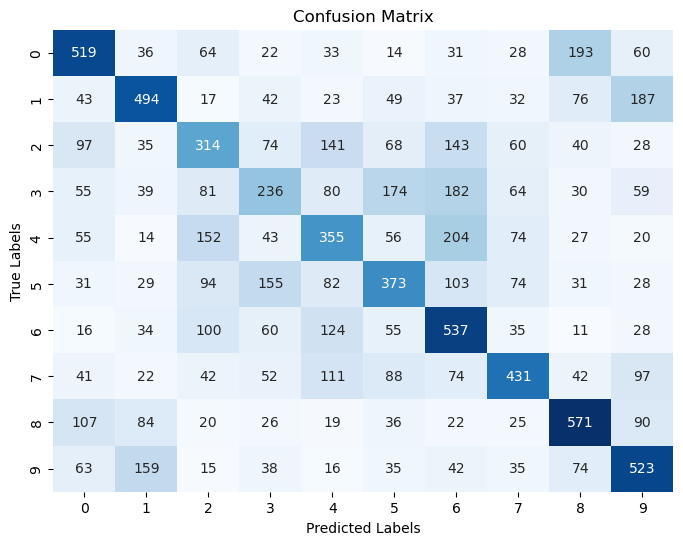

In [13]:
# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
conda install graphviz python-graphviz

Retrieving notices: ...working... done
Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\CaptainPark\anaconda3

  added / updated specs:
    - graphviz
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       haedb8bc_5         1.9 MB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fontconfig-2.14.1          |       hc0defaf_1         198 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0




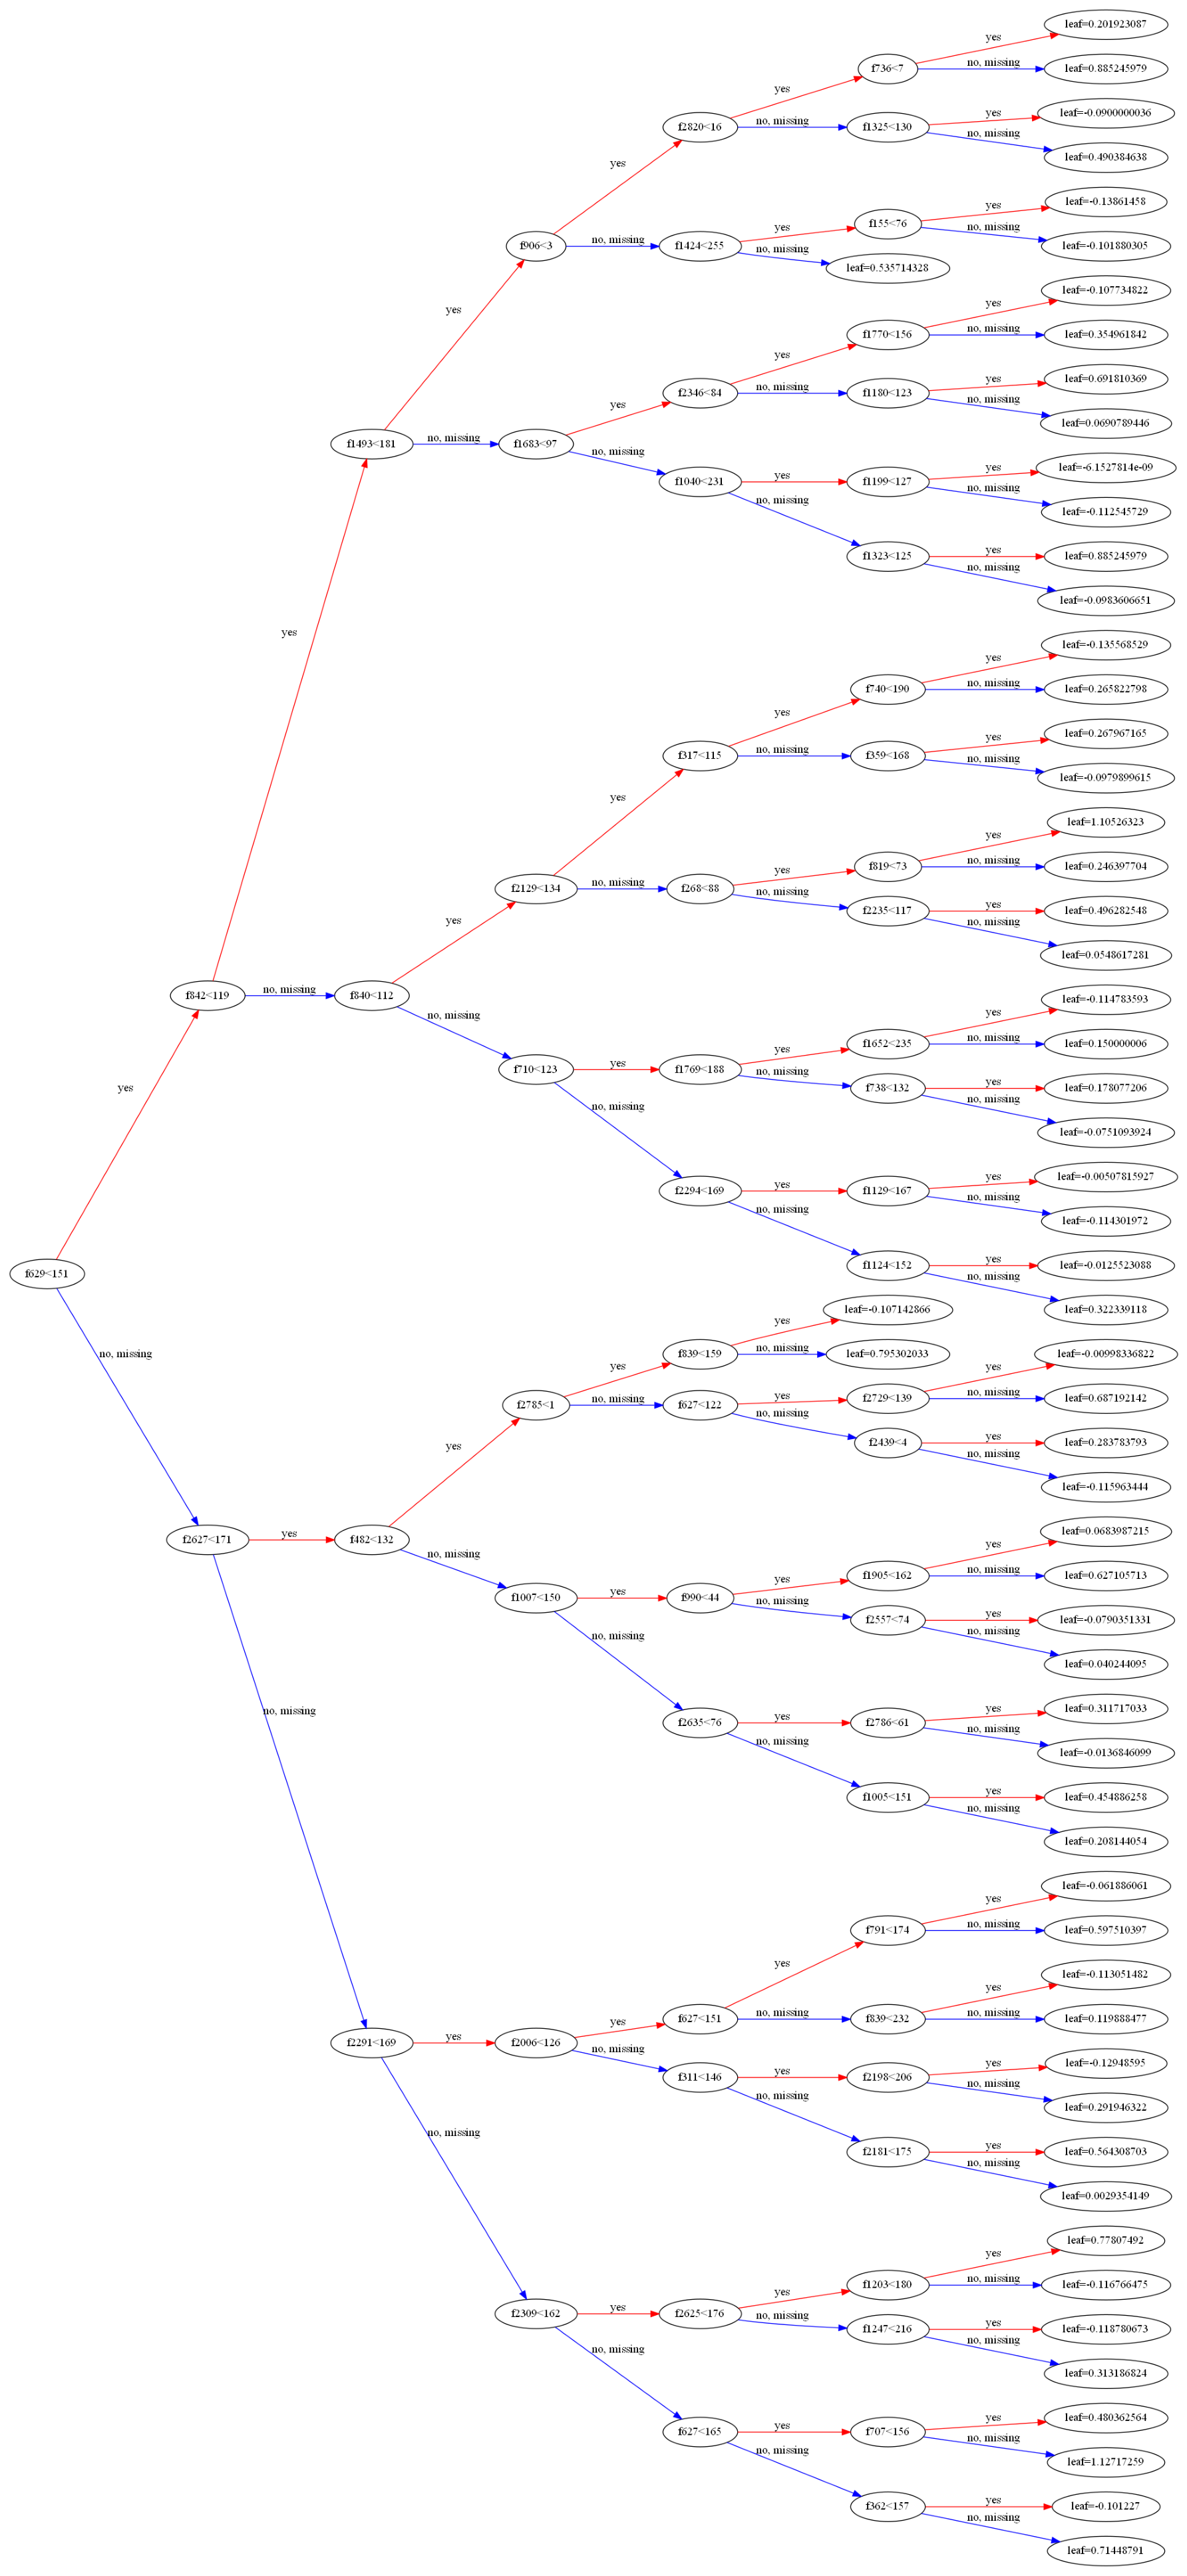

In [48]:
# 의사결정 트리 시각화
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(50, 50))
plot_tree(bst, num_trees=0, rankdir='LR', ax=ax)  # num_trees는 시각화할 트리의 번호입니다.
#fig.set_size_inches(150, 100)

plt.show()

In [44]:
xgb_ytest = y_test
xgb_ypred = y_pred
xgb_val_error = validation_errors

# 2. ResNet

#### (1) 데이터 셋 불러오기

In [88]:
import sklearn
import tensorflow as tf
import keras

from tensorflow.keras import layers, models

# cifar 데이터 새로 불러오기
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련(학습) 데이터
x_train, y_train = x_train_full[:~5000], y_train_full[:~5000]
# 검증 데이터
x_valid, y_valid = x_train_full[~5000:], y_train_full[~5000:]

# 이미지 학습을 위해 정규화
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0

#### (2) ResNet-18 모델 구축

In [91]:
class IdentityBlock(tf.keras.Model):
    def __init__(self, filters=64, kernel_size=3, activation='relu'):
        super(IdentityBlock, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn1 = tf.keras.layers.BatchNormalization()
        
        self.conv2 = tf.keras.layers.Conv2D(filters, kernel_size, padding='same')
        self.bn2 = tf.keras.layers.BatchNormalization()
        
        self.ac = tf.keras.layers.Activation(activation)
        self.add = tf.keras.layers.Add()  # skip connection
        
    def call(self, input_data):
        x = self.conv1(input_data)
        x = self.bn1(x)
        x = self.ac(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.ac(x)

        x = self.add([x, input_data])
        x = self.ac(x)
        return x

class ResNet(tf.keras.Model):
    def __init__(self, num_classes, activation1, activation2):
        super(ResNet, self).__init__()
        self.conv = tf.keras.layers.Conv2D(64, 7, padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.ac = tf.keras.layers.Activation(activation=activation1)
        self.max_pool = tf.keras.layers.MaxPool2D((3, 3))
        self.id_block1 = IdentityBlock(filters=64, kernel_size=3, activation=activation1)
        self.id_block2 = IdentityBlock(filters=64, kernel_size=3, activation=activation1)
        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(num_classes, activation=activation2)
        
    def call(self, input_data):
        x = self.conv(input_data)
        x = self.bn(x)
        x = self.ac(x)
        x = self.max_pool(x)

        x = self.id_block1(x)
        x = self.id_block2(x)

        x = self.global_pool(x)
        x = self.classifier(x)
        
        return x

In [92]:
# 모델 생성
resnet = ResNet(num_classes, activation1='relu', activation2='softmax')
resnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = resnet.fit(x_train, y_train, epochs=ep, validation_data=(x_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 94s 66ms/step - loss: 1.4093 - accuracy: 0.4899 - val_loss: 1.9135 - val_accuracy: 0.3971
Epoch 2/10
1407/1407 [==============================] - 93s 66ms/step - loss: 1.0829 - accuracy: 0.6168 - val_loss: 1.3124 - val_accuracy: 0.5205
Epoch 3/10
1407/1407 [==============================] - 101s 72ms/step - loss: 0.9391 - accuracy: 0.6692 - val_loss: 1.4765 - val_accuracy: 0.4985
Epoch 4/10
1407/1407 [==============================] - 91s 64ms/step - loss: 0.8345 - accuracy: 0.7096 - val_loss: 0.8982 - val_accuracy: 0.6883
Epoch 5/10
1407/1407 [==============================] - 89s 64ms/step - loss: 0.7486 - accuracy: 0.7401 - val_loss: 1.0497 - val_accuracy: 0.6407
Epoch 6/10
1407/1407 [==============================] - 92s 65ms/step - loss: 0.6852 - accuracy: 0.7618 - val_loss: 1.0392 - val_accuracy: 0.6495
Epoch 7/10
1407/1407 [==============================] - 89s 63ms/step - loss: 0.6340 - accuracy: 0.7810 - val_loss: 0.7276 

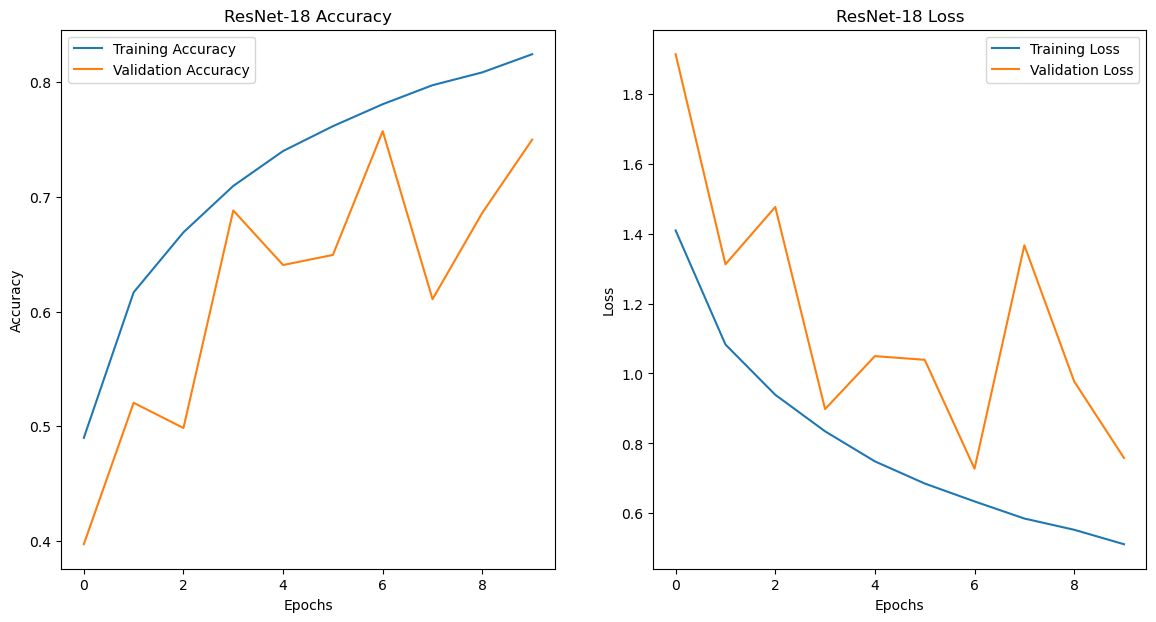

In [101]:
# 정확도, 손실 확인
plt.figure(figsize=(14, 7))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ResNet-18 Accuracy')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ResNet-18 Loss')

plt.show()

#### (3) 예측 데이터 생성 및 모델 평가

313/313 [==============================] - 6s 20ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

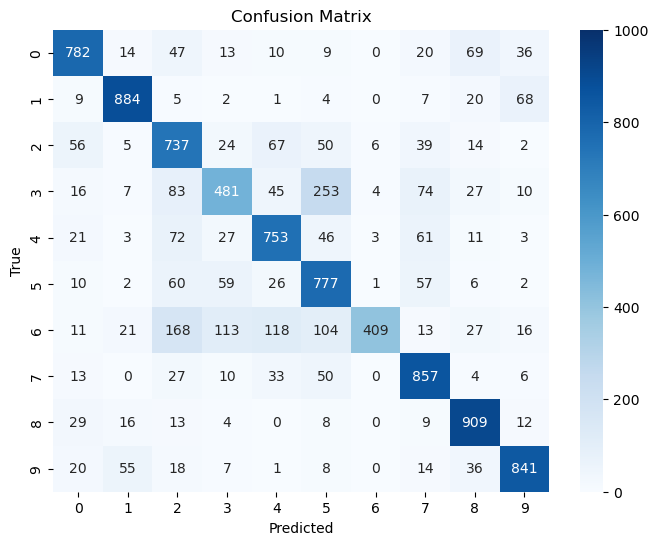

In [99]:
# Test 데이터로 모델 평가
test_loss, test_acc = resnet.evaluate(x_test, y_test)

y_pred = resnet.predict(x_test)
predicted_class = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, predicted_class)

# confusion matrix 확인
conf_matrix = confusion_matrix(y_test, predicted_class)
plt.figure(figsize=(8, 6)) # 이미지 사이즈를 6x8 정도 크기로 (eg. x=6cm일때 y=8cm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', vmin=0, vmax=1000)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show

In [95]:
res_history = history
res_ytest = y_test
res_ypred = y_pred
res_predclass = predicted_class

# 3. GoogLeNet

#### (1) 데이터 불러오기

In [68]:
from tensorflow.image import resize
from tensorflow.keras.utils import to_categorical

# CIFAR-10 데이터 새로 로드
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

#데이터 정규화
x_train = X_train_full.astype('float32') / 255.0
x_valid = X_test.astype('float32') / 255.0

## 훈련/학습 데이터 나누기
x_train, y_train = X_train_full[:~5000], y_train_full[:~5000]
x_valid, y_valid = X_train_full[~5000:], y_train_full[~5000:]

#원핫인코딩. cifar10 클래스 10개
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

#### (2) GoogLeNet 모델 구축

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Dropout, Flatten, concatenate
import sys
from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.models import Model

#인셉션
def inception_block(input, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    conv_1x1 = Conv2D(filters=filters_1x1, kernel_size=(1, 1), padding='same', activation='relu')(input)

    conv_3x3_reduce = Conv2D(filters=filters_3x3_reduce, kernel_size=(1, 1), padding='same', activation='relu')(input)

    conv_3x3 = Conv2D(filters=filters_3x3, kernel_size=(3, 3), padding='same', activation='relu')(conv_3x3_reduce)

    conv_5x5_reduce  = Conv2D(filters=filters_5x5_reduce, kernel_size=(1, 1), padding='same', activation='relu')(input)

    conv_5x5 = Conv2D(filters=filters_5x5, kernel_size=(5, 5), padding='same', activation='relu')(conv_5x5_reduce)

    maxpool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(input)

    maxpool_proj = Conv2D(filters=filters_pool_proj, kernel_size=(1, 1),  strides=(1, 1), padding='same', activation='relu')(maxpool)

    return layers.concatenate([conv_1x1, conv_3x3, conv_5x5, maxpool_proj], axis=3)  # use tf as backend

#conv layer -> inception module
def googlenet(weight_path = None):

    input = Input(shape=(32, 32, 3))

    conv1_7x7_s2 = Conv2D(filters=32, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu',)(input)

    maxpool1_3x3_s2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv1_7x7_s2)

    conv2_3x3_reduce = Conv2D(filters=64, kernel_size=(1, 1), padding='same', activation='relu')(maxpool1_3x3_s2)

    conv2_3x3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(conv2_3x3_reduce)

    maxpool2_3x3_s2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(conv2_3x3)

    inception_3a = inception_block(input=maxpool2_3x3_s2, filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128, filters_5x5_reduce=16, filters_5x5=32, filters_pool_proj=32)

    inception_3b = inception_block(input=inception_3a, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192, filters_5x5_reduce=32, filters_5x5=96, filters_pool_proj=64)
    maxpool3_3x3_s2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(inception_3b)

    inception_4a = inception_block(input=maxpool3_3x3_s2, filters_1x1=192, filters_3x3_reduce=96, filters_3x3=208, filters_5x5_reduce=16, filters_5x5=48, filters_pool_proj=64)

    inception_4b = inception_block(input=inception_4a, filters_1x1=160, filters_3x3_reduce=112, filters_3x3=224, filters_5x5_reduce=24, filters_5x5=64, filters_pool_proj=64)

    inception_4c = inception_block(input=inception_4b, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=256, filters_5x5_reduce=24, filters_5x5=64, filters_pool_proj=64)

    inception_4d = inception_block(input=inception_4c, filters_1x1=112, filters_3x3_reduce=144, filters_3x3=288, filters_5x5_reduce=32, filters_5x5=64, filters_pool_proj=64)

    inception_4e = inception_block(input=inception_4d, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool_proj=128)

    maxpool4_3x3_s2 = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(inception_4e)

    inception_5a = inception_block(input=maxpool4_3x3_s2, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320, filters_5x5_reduce=32, filters_5x5=128, filters_pool_proj=128)

    inception_5b = inception_block(input=inception_5a, filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384, filters_5x5_reduce=48, filters_5x5=128, filters_pool_proj=128)

    averagepool1_7x7_s1 = AveragePooling2D(pool_size=(7, 7), strides=(7, 7), padding='same')(inception_5b)

    flatten_layer = Flatten()
    drop1 = Dropout(rate=0.4)(averagepool1_7x7_s1)
    linear = Dense(units=10, activation='sigmoid')(flatten_layer(drop1))

    last = linear

    model = Model(inputs=input, outputs=last)

    return model

In [70]:
model = googlenet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 증강
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=30
)

datagen.fit(x_train)

# 모델 학습
history = model.fit(x_train, y_train, batch_size=64, epochs=ep, validation_data=(x_valid, y_valid))

Epoch 1/10
704/704 [==============================] - 337s 472ms/step - loss: 2.3059 - accuracy: 0.1069 - val_loss: 2.3029 - val_accuracy: 0.0978
Epoch 2/10
704/704 [==============================] - 317s 451ms/step - loss: 2.2370 - accuracy: 0.1334 - val_loss: 2.1851 - val_accuracy: 0.1488
Epoch 3/10
704/704 [==============================] - 308s 438ms/step - loss: 1.9487 - accuracy: 0.2056 - val_loss: 1.9190 - val_accuracy: 0.2625
Epoch 4/10
704/704 [==============================] - 303s 430ms/step - loss: 1.7258 - accuracy: 0.3229 - val_loss: 1.6512 - val_accuracy: 0.3521
Epoch 5/10
704/704 [==============================] - 321s 456ms/step - loss: 1.5659 - accuracy: 0.4048 - val_loss: 1.6167 - val_accuracy: 0.3967
Epoch 6/10
704/704 [==============================] - 310s 440ms/step - loss: 1.4713 - accuracy: 0.4547 - val_loss: 1.4265 - val_accuracy: 0.4687
Epoch 7/10
704/704 [==============================] - 309s 439ms/step - loss: 1.3776 - accuracy: 0.4955 - val_loss: 1.3660 -

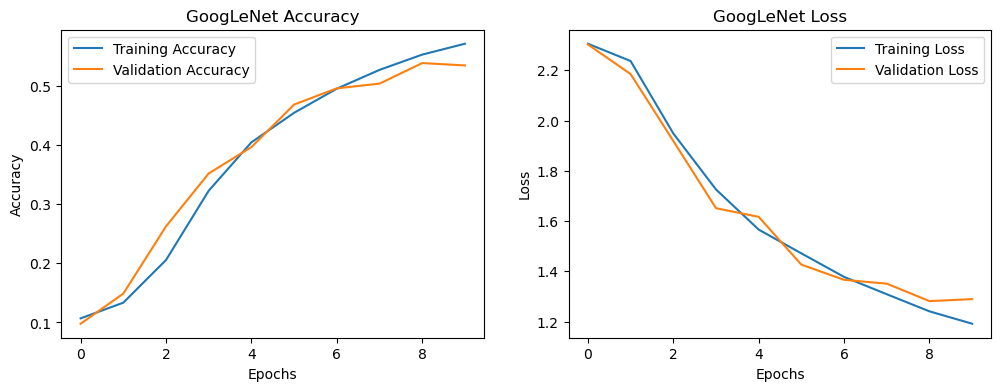

In [100]:
import sklearn
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('GoogLeNet Accuracy')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('GoogLeNet Loss')

plt.show()

#### (3) 예측 데이터 생성 및 모델 평가

313/313 [==============================] - 12s 35ms/step


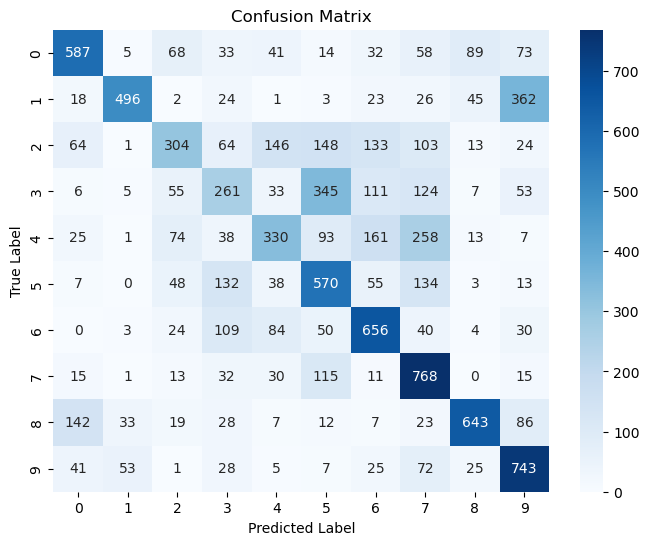

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# confusion matrix 생성
cm = confusion_matrix(y_test, predicted_labels)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [84]:
google_history = history
google_ytest = y_test
google_ypred = predictions
google_predclass = predicted_labels

# 비교

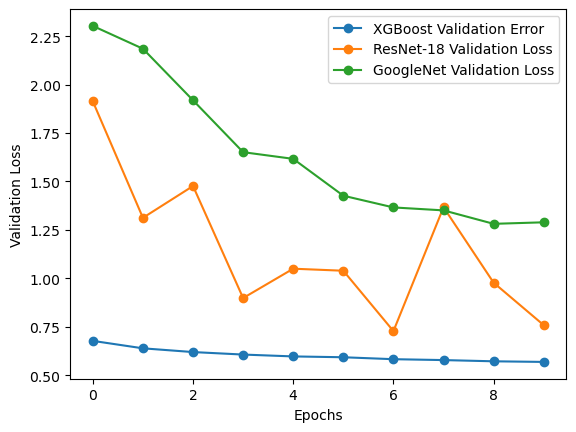

In [108]:
# 손실 확인
plt.plot(range(0, len(xgb_val_error)), xgb_val_error, label='XGBoost Validation Error', marker='o')
plt.plot(res_history.history['val_loss'], label='ResNet-18 Validation Loss', marker='o')
plt.plot(google_history.history['val_loss'], label='GoogleNet Validation Loss', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

plt.show()